In [5]:
print("Salve")

Salve


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

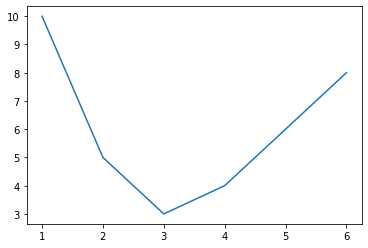

In [6]:
a = [1, 2, 3, 4, 5 ,6]
b = [10, 5, 3, 4, 6, 8]
plt.plot(a, b)
plt.show()

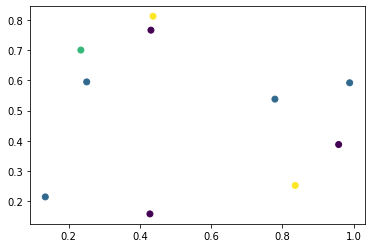

In [7]:
x = np.random.rand(10)
y = np.random.rand(10)
color = [1, 1, 2, 2, 2, 2, 3, 4, 1, 4]
plt.scatter(x=x, y=y, c=color);